# Computer Vision Assignment 2

Vusuvandla Khagesh Kumar <br>
170102070 <br>
ECE

In [41]:
%matplotlib inline

In [42]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from collections import deque

In [43]:
def jaccard_similarity_index(img,reference):
    a_intersection_b = np.sum(img[img==reference])
    a_union_b = dim[0]*dim[1]
    return a_intersection_b/a_union_b

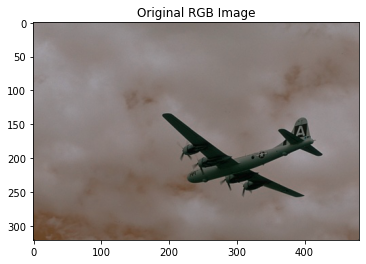

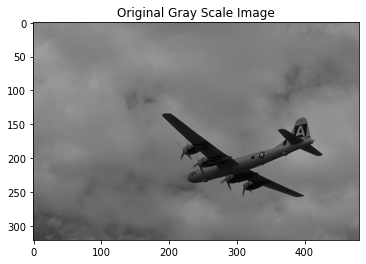

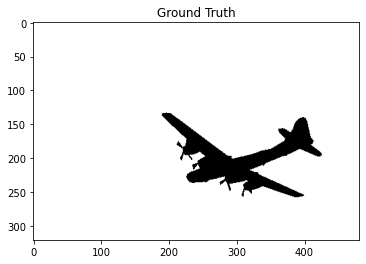

In [44]:
# RGB
img = cv2.imread('image.jpg')
img = np.array(img,dtype=np.int64)

plt.imshow(img, vmin=0, vmax=255)
plt.title('Original RGB Image')
plt.show()

# Gray
gray_img = cv2.imread('image.jpg',0)
gray_img = np.array(gray_img,dtype=np.int64)

plt.imshow(gray_img,cmap='gray', vmin=0, vmax=255)
plt.title('Original Gray Scale Image')
plt.show()

# Ground Truth
ground_truth = cv2.imread('ground_truth.png',0)
reference = ground_truth.copy()
reference[ground_truth<=30] = 1
reference[ground_truth>30] = 0

plt.imshow(reference,cmap='gray', vmin=0, vmax=1)
plt.title('Ground Truth')
plt.show()

# dimensions
dim = img.shape
if(len(dim)<=2):
    dim = (dim[0],dim[1],1)

# a) Region Growing Algorithm

### Part 1: Considering Neighbour

In [45]:
def distance(img, point, new_point):
    norm = np.linalg.norm(img[point[0],point[1]] - img[new_point[0],new_point[1]])
    return norm

In [46]:
region = np.zeros((dim[0],dim[1]))
visited = np.zeros((dim[0],dim[1]),dtype=bool)

threshold = 5

queue = deque([(180,270)])
#queue = deque([(180,270),(230,300),(250,390)])

for point in queue:
    region[point[0],point[1]] = 0
    visited[point[0],point[1]] = True
while(queue):
    point = queue[-1]
    queue.pop()
    for i in (-1,0,1):
        for j in (-1,0,1):
            if(i==0 and j==0):
                continue
            new_point = (point[0]+i,point[1]+j)
            if(new_point[0]<0 or new_point[0]>=dim[0]):
                continue
            if(new_point[1]<0 or new_point[1]>=dim[1]):
                continue
            if((not visited[new_point[0],new_point[1]]) and region[new_point[0],new_point[1]]==0 and distance(gray_img,point,new_point)<threshold):
                visited[new_point[0],new_point[1]] = True
                region[new_point[0],new_point[1]] = 1
                queue.append(new_point)
region_growing = region.copy()


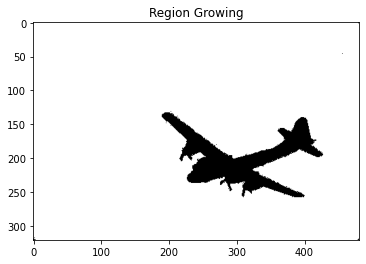

Jaccard Similarity Index for Region Growing Algorithm: 0.9356286552548235


In [47]:
#region = np.ones((dim[0],dim[1]))

plt.imshow(region_growing,cmap='gray', vmin=0, vmax=1)
plt.title('Region Growing')
plt.savefig('results/region_growing.png')
plt.show()


print('Jaccard Similarity Index for Region Growing Algorithm:',jaccard_similarity_index(region_growing,reference))

### Part 2: Without Considering Neighbour (Ignore this method)

In [48]:
min_intensity = np.min(gray_img)
indices = np.where(gray_img==min_intensity)
seed = np.array(indices).T[0]

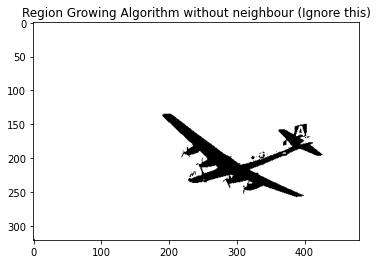

In [49]:
region = np.ones((dim[0],dim[1]))
threshold = 50
region[gray_img-min_intensity<threshold] = 0
plt.imshow(region,cmap='gray', vmin=0, vmax=1)
plt.title('Region Growing Algorithm without neighbour (Ignore this)')
plt.show()

# b) Watershed algorithm

In [50]:
def assig_neighbour(img, intensity, neighbours, x, y):
    '''
    Ignore this function.
    If below function does not work, replace with this function
    '''
    Set = set({})
    new_region = False
    for i,j in neighbours:
        if(x+i<0 or x+i>=dim[0] or y+j<0 or y+j>=dim[1]):
            continue
        if(region[x+i,y+j]!=0 and abs(intensity-img[x+i,y+j])<=1): 
            Set.add(region[x+i,y+j])
        if(abs(intensity-img[x+i,y+j])>1):
            new_region = True
    List = list(Set)
    List.sort()
    if(len(List)==1):
        return List[0]
    elif(len(List)>1):
        return List[0]
    return -1

In [51]:
def assign_neighbour(img, intensity, region, neighbours, x, y):
    '''
    Set = set({})
    for i,j in neighbours:
        if(x+i<0 or x+i>=dim[0] or y+j<0 or y+j>=dim[1]):
            continue
        if(region[x+i,y+j]!=0): 
            Set.add(region[x+i,y+j])
    List = list(Set)
    List.sort()
    '''

    Dict = {}
    for i,j in neighbours:
        if(x+i<0 or x+i>=dim[0] or y+j<0 or y+j>=dim[1] or region[x+i,y+j]==0):
            continue
        if (Dict.get(region[x+i][y+j]) == None):
            Dict[region[x+i][y+j]] = 1 
        else:
            Dict[region[x+i][y+j]] += 1 

    List = []
    for key,value in Dict.items():
        List.append((value,key))
    List.sort()

    if(len(List)==0):
        return -1
    return List[-1][1]

In [52]:
region = np.zeros(gray_img.shape)
region_count = 0

intensities = []
for i in range(dim[0]):
    for j in range(dim[1]):
        intensities.append((gray_img[i][j],i,j))
intensities.sort()

region_count = 0

neighbours = np.array([[-1,-1],[-1,0],[-1,1],  [0,-1],[0,1],  [1,-1],[1,0],[1,1]])
for intensity,x,y in intensities:
    neighbour_region = assign_neighbour(gray_img,intensity,region,neighbours,x,y)
    if(neighbour_region>=0):
        region[x,y] = neighbour_region
    else:
        region_count+=1
        region[x,y] = region_count
region_copy = region.copy()

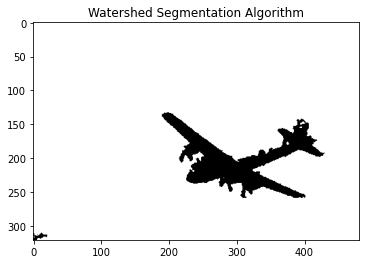

Jaccard Similarity Index for Watershed Algorithm: 0.9332841108542043


In [53]:
threshold = 550
region_copy[region<threshold] = 0
region_copy[region>=threshold] = 1
region_copy[region==0] = 1

watershed = region_copy.copy()
plt.imshow(region_copy,cmap='gray', vmin=0, vmax=1)
plt.title('Watershed Segmentation Algorithm')
plt.savefig('results/watershed.png')
plt.show()

print('Jaccard Similarity Index for Watershed Algorithm:',jaccard_similarity_index(watershed,reference))

# K-means algorithm

In [54]:
def Kmeans(img, dim, k, centroids):
    '''
    Inputs:
        img : image
        dim : dimension of image in tuple
        k : number of clusters
        centroids : initial centroids
    return:
        cluster_matrix : 2-d array of image size with each element mapped to one cluster denoting 0,1,2...
        centroids : 2-d array with each row denoting the centroid of each cluster denoted by 0,1,2...
    '''
    distance_matrix = np.zeros((k,dim[0],dim[1]))
    for i in range(k):
        if(dim[2]>1):
            distance_matrix[i] = np.linalg.norm(img-centroids[i],axis=2)
        else:
            distance_matrix[i] = abs(img-centroids[i])
    cluster_matrix = np.argmin(distance_matrix,axis=0)
    #print(distance_matrix)
    for i in range(k):
        indices = np.where(cluster_matrix==i)
        indices = np.array(indices)
        if(dim[2]>1):
            points = img[indices[0,:],indices[1,:],:]
        else:
            points = img[indices[0,:],indices[1,:]]
        #print(len(points))
        if(len(points)!=0):
            centroids[i] = np.mean(points,axis=0)
    return (cluster_matrix, centroids)

In [55]:
# Numer of clusters - 2
k = 2

np.random.seed(2020)
Centroids = np.random.randint(255,size=(k,dim[2]))

centroids = Centroids.copy()
for i in range(1000):
    local_centroids = centroids.copy()
    cluster_matrix, centroids  = Kmeans(img,dim,k,centroids.copy())

    # Break the loop when input and output centroids donot change
    if(np.linalg.norm(centroids-local_centroids)==0):
        break
    print("iteration no.",i)


iteration no. 0
iteration no. 1
iteration no. 2
iteration no. 3
iteration no. 4
iteration no. 5
iteration no. 6
iteration no. 7
iteration no. 8
iteration no. 9
iteration no. 10
iteration no. 11


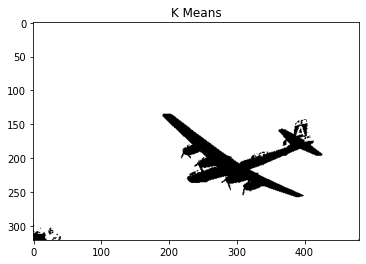

Jaccard Similarity Index for K Means Algorithm: 0.937623460987947


In [56]:
k_means = cluster_matrix.copy()
plt.imshow(cluster_matrix,cmap='gray', vmin=0, vmax=k-1)
plt.title('K Means')
plt.savefig('results/k_means.png')
plt.show()

print('Jaccard Similarity Index for K Means Algorithm:',jaccard_similarity_index(k_means,reference))

# Conclusion

In [57]:
print('Jaccard Similarity Index for Region Growing Algorithm:',jaccard_similarity_index(region_growing,reference))
print('Jaccard Similarity Index for Watershed Algorithm     :',jaccard_similarity_index(watershed,reference))
print('Jaccard Similarity Index for K Means Algorithm       :',jaccard_similarity_index(k_means,reference))

Jaccard Similarity Index for Region Growing Algorithm: 0.9356286552548235
Jaccard Similarity Index for Watershed Algorithm     : 0.9332841108542043
Jaccard Similarity Index for K Means Algorithm       : 0.937623460987947


## Obervations
1. We can see that K Mean performs slightly better than other two segmentation algorithms.
2. K Means is consistent with random initialization, where as region growing algorithm fails on random initialization. It requires human intervention to mark the seeds. Slight change in threshold also causes drastic changes in output.
3. We can also observe that Watershed algorithm does not have random initialization, so the output is predictable.
4. Regional growing algorthm and watershed algorithm are segmentation algorithms based on locality, where as K means algorithm is based on pixel intensities only.
5. Out of all there K means is comparitively fast in most of the cases. 